# Echo State Networks
This notebook illustrates the use of this ESN library by an example. The goal will be to forecast air quality measurements.


### Import Libraries

In [1]:
import sys, os, ssl
sys.path.append(os.path.join(os.getcwd(), "..", "Source"))

from EchoStateNetworks import EchoStateNetwork
from dataUtils import Data

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

### Load and Scale Data
ESNs work best when the data is scaled on an intervall around zero e.g. (0,1) or (-1, 1). You could either pass the respective input shift, input scaling and input mask or scale the date beforehand.

In [3]:
def fetch_data():
    # Load data, if csv doesn't exist
    ssl._create_default_https_context = ssl._create_unverified_context
    url = r'https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip'
    zip_archive = urlopen(url)
    
    csv_data = ZipFile(BytesIO(zip_archive.read())).extract('AirQualityUCI.csv')
    data = pd.read_csv(csv_data, sep=";")
    return data

def load_data(path=None):
    # Load data from csv oder fetch it online
    try:
        data = pd.read_csv(path, sep=";", header=[0])
        print("Data loaded from csv")
    except FileNotFoundError:
        data = fetch_data()
        print("Data loaded from the web")
        
    data = data.dropna(axis='index', how='all')
    data = data.drop(['Unnamed: 15','Unnamed: 16'], axis=1)
    return data

Data loaded from csv


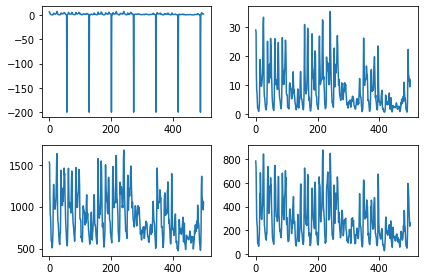

In [4]:
data_raw = load_data(os.path.join(os.getcwd(), "AirQualityUCI.csv"))

data = Data(model_input=data_raw[["CO(GT)", "C6H6(GT)", "PT08.S2(NMHC)", "NOx(GT)"]], 
            model_output=data_raw[["CO(GT)", "C6H6(GT)", "PT08.S2(NMHC)", "NOx(GT)"]])
data.split_data_by_index(8000)
data.visualize()

scaler = MinMaxScaler(feature_range=(0, 1))
data.scale_data(scaler) 

### Initialize and train Echo State Network

In [5]:
my_esn = EchoStateNetwork(no_input_nodes=4, 
                          no_output_nodes=4,
                          no_internal_nodes=50,
                          spectral_radius=0.7,
                          regression_lambda=1e-5)
print(my_esn)

Name		ESN_model
No. Inputs	4
No. Outputs	4
Reservoir Size	50
Spectral Radius	0.7
Reg. Lambda	1e-05
Input Shift 	0.0
Input Scaling	1.0
Connectivity	0.2
Trained		False


#### Visualize Fit on the Training Set
Hyperparamter are not optimized

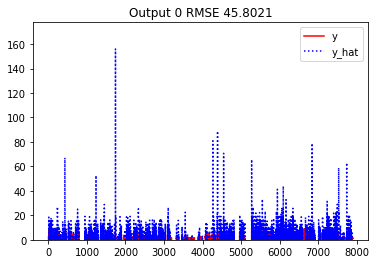

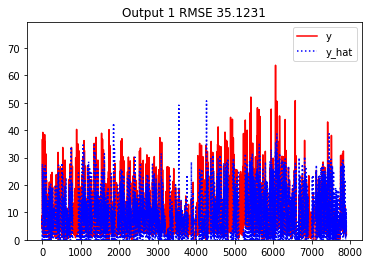

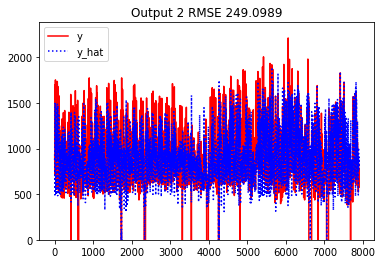

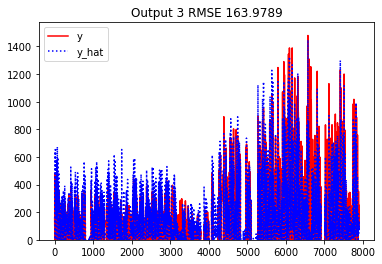

In [6]:
my_esn.fit(data, no_forget_points=100)
y_hat, y_train = my_esn.visualize_fit(data.x_train, data.y_train, data.scale)

#### Visualize Fit on the Test Set
_to be done_

#### Optimize Hyperparamter
_to be done_

### Data
The data comes from the [UCI Machine Learning Respository](https://archive.ics.uci.edu/ml/index.php). 

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. 
Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008  eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.